In [3]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

<h1>data shape</h1>

In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


y = 1
y = 1


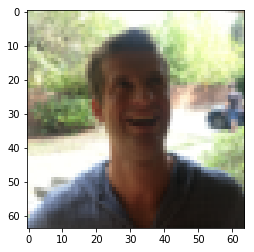

In [11]:
index = 3
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))
print ("y = " + str((Y_train_orig[0, index])))

In [13]:
def HappyModel(input_shape):
    """
    实现一个检测笑容的模型

    参数：
        input_shape - 输入的数据的维度
    返回：
        model - 创建的Keras的模型

    """

    
    X_input = Input(input_shape)

    #使用0填充：X_input的周围填充0
    X = ZeroPadding2D((3, 3))(X_input)

    #对X使用 CONV -> BN -> RELU 块
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    #最大值池化层
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    #降维，矩阵转化为向量 + 全连接层
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    #创建模型，讲话创建一个模型的实体，我们可以用它来训练、测试。
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model


In [14]:
happyModel = HappyModel(X_train.shape[1:])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [29]:
X_train.shape

(600, 64, 64, 3)

In [16]:
happyModel.fit(X_train, Y_train, epochs=40, batch_size=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
600/600 [==============================] - 9s 15ms/step - loss: 2.8657 - acc: 0.5417
Epoch 2/40
600/600 [==============================] - 8s 14ms/step - loss: 0.7854 - acc: 0.7150
Epoch 3/40
600/600 [==============================] - 9s 15ms/step - loss: 0.3705 - acc: 0.8350
Epoch 4/40
600/600 [==============================] - 9s 14ms/step - loss: 0.2149 - acc: 0.9100
Epoch 5/40
600/600 [==============================] - 9s 14ms/step - loss: 0.1533 - acc: 0.9367
Epoch 6/40
600/600 [==============================] - 9s 14ms/step - loss: 0.1441 - acc: 0.9383
Epoch 7/40
600/600 [==============================] - 8s 14ms/step - loss: 0.0945 - acc: 0.9717
Epoch 8/40
600/600 [==============================] - 8s 14ms/step - loss: 0.0811 - acc: 0.9733
Epoch 9/40
600/600 [==============================] - 8s 14ms/step - loss: 0.0787 - acc: 0.9783
Epoch 10/40
600/600 [==============================] - 8s 14ms/step - loss: 0.0873 - acc

In [17]:
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 0.09392527818679809
Test Accuracy = 0.9600000039736429


In [18]:
preds

[0.09392527818679809, 0.9600000039736429]

<h1>查看一下</h1>

In [22]:
import scipy
from scipy import ndimage

In [24]:
Y_test[0]

array([1], dtype=int64)

In [28]:
X_test[0].shape

(64, 64, 3)

In [31]:
x1=X_test[0].reshape(-1,64,64,3)

In [32]:

my_image_prediction = happyModel.predict(x1)

In [33]:
my_image_prediction

array([[0.99960905]], dtype=float32)

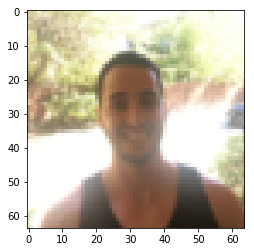

In [35]:
plt.imshow(X_test[0])

In [36]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________